In [1]:
%pylab inline
import numpy as np
from queue import deque

from tools import create_sin, make_timeseries, split_train_test, visualize_random_data
from tools import batch_loader, shuffle

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Input
from keras.layers import SimpleRNN, Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from seq2seq.models import Seq2Seq
from sklearn.metrics import r2_score, mean_squared_error


from pprint import pprint as pp

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


# Data

train_x: (5232, 64, 1)
train_y: (5232, 64, 1)
test_x : (1308, 64, 1)
test_y : (1308, 64, 1)


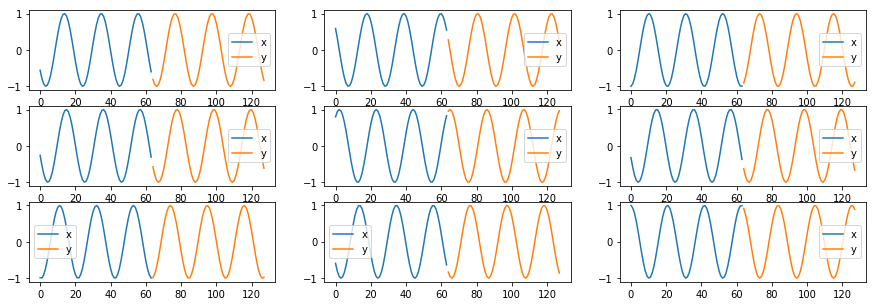

In [2]:
X_SIZE = 64
Y_SIZE = 64

data = create_sin()
data_x, data_y = make_timeseries(data, x_size=X_SIZE, y_size=Y_SIZE)
train_x, test_x = split_train_test(data_x)
train_y, test_y = split_train_test(data_y)

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x :', test_x.shape)
print('test_y :', test_y.shape)

visualize_random_data(train_x, train_y)

# Model

In [3]:
TIME_SERIES_SIZE = 64
FEATURE_SIZE = 1
HIDDEN_SIZE = 32
model = Seq2Seq(input_shape=(TIME_SERIES_SIZE, FEATURE_SIZE), 
                input_length=FEATURE_SIZE, 
                hidden_dim=HIDDEN_SIZE,
                depth=1,
                output_dim=1, 
                output_length=TIME_SERIES_SIZE, 
                peek=True)
model.compile(loss='mse', optimizer='adam')

# Train

In [7]:
model.fit(train_x, train_y, epochs=4, verbose=2)

Epoch 1/4
26s - loss: 9.2601e-04
Epoch 2/4
26s - loss: 4.4476e-04
Epoch 3/4
26s - loss: 5.2646e-04
Epoch 4/4
27s - loss: 3.2158e-04


# Evaluate

R^2 : 0.999503092055
MSE : 0.000248441109994


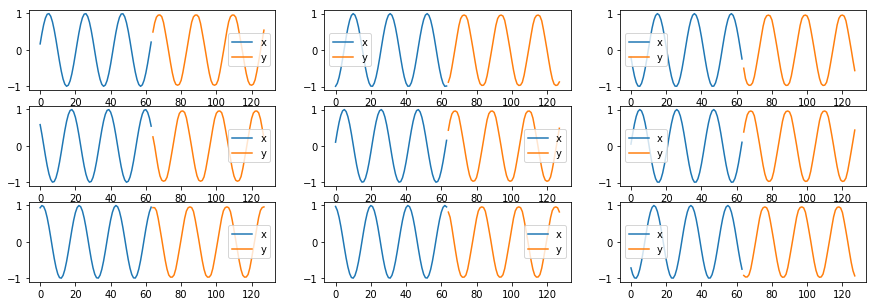

In [9]:
def evaluate(test_x, test_y, pred_y):
    test_y = test_y.reshape(-1, Y_SIZE)
    pred_y = pred_y.reshape(-1, Y_SIZE)

    score = r2_score(test_y, pred_y)
    print('R^2 :', score)
    print('MSE :', mean_squared_error(test_y, pred_y))

pred_y = model.predict(test_x)
evaluate(test_x, test_y, pred_y)
visualize_random_data(test_x, pred_y)